In [78]:
import numpy as np
from datetime import *
import requests as Req
from lxml import etree
from typing import List

In [169]:
#根据基金代码到 天天基金网拉取数据
# http://fund.eastmoney.com/f10/F10DataApi.aspx?type=lsjz&code=020003&page=10&per=20&sdate=2016-10-01&edate=2017-10-01
#lsjz 历史净值
#code 基金代码
#sdate 开始时间 格式:2016-10-01 
#edate 结束时间 格式:2017-10-01
#per 每页多少条
#page 第几页
#返回 [(日期,净值,增长率)]
def get_raw_data(code: str, sdate: date = None, edate: date = None) -> str:
    if edate is None:
        edate = datetime.now().date()

    if sdate is None:
        sdate = date(edate.year - 3, edate.month, edate.day)

    print(code, sdate, edate)

    url: str = f"http://fund.eastmoney.com/f10/F10DataApi.aspx?type=lsjz&code={code}&page=1&per=3000&sdate={sdate}&edate={edate}"
    print("开始加载数据", url)

    resp: Req.Response = Req.get(url, headers={
        "user-agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36",
        "Accept-Encoding": "gzip, deflate",
    "Accept-Language":"zh-CN,zh;q=0.8,en-US;q=0.6,en;q=0.4"})

    result_str:str = resp.content.decode("utf-8")
#    print(result_str)
#    print(result_str.index("<table"), result_str.index("table>"))
    data_str:str = result_str[result_str.index("<table"):result_str.index("table>")+len("table>")]
    #print(data_str)
    return data_str



In [182]:
#020003国泰金龙行业精选
#sdate 开始日期,设置为空, 默认为现在时间的三年前
#edate 结束日期, 默认为现在时间
el:etree._Element = etree.HTML(get_raw_data("020003", sdate=date(2017, 6, 1)))


020003 2017-06-01 2017-10-03
开始加载数据 http://fund.eastmoney.com/f10/F10DataApi.aspx?type=lsjz&code=020003&page=1&per=3000&sdate=2017-06-01&edate=2017-10-03


In [196]:
trList:List[etree._Element] = el.xpath("//tbody/tr")
#[print([td for td in tr.xpath("./td/text()")[:4]], "\n") for tr in trList[0:10]]
data:np.ndarray = np.array([[td for td in tr.xpath("./td/text()")[:4]] for tr in trList])
data = np.array([[datetime.strptime(row[0], '%Y-%m-%d'), float(row[1]), float(row[2]), float(row[3][:-1])] for row in data])
print(len(data), data[0:10])

87 [[datetime.datetime(2017, 9, 29, 0, 0) 0.662 5.398 2.32]
 [datetime.datetime(2017, 9, 28, 0, 0) 0.647 5.351 0.31]
 [datetime.datetime(2017, 9, 27, 0, 0) 0.645 5.345 0.78]
 [datetime.datetime(2017, 9, 26, 0, 0) 0.64 5.33 0.0]
 [datetime.datetime(2017, 9, 25, 0, 0) 0.64 5.33 -0.78]
 [datetime.datetime(2017, 9, 22, 0, 0) 0.645 5.345 0.31]
 [datetime.datetime(2017, 9, 21, 0, 0) 0.643 5.339 -0.77]
 [datetime.datetime(2017, 9, 20, 0, 0) 0.648 5.355 0.15]
 [datetime.datetime(2017, 9, 19, 0, 0) 0.647 5.351 -0.46]
 [datetime.datetime(2017, 9, 18, 0, 0) 0.65 5.361 0.93]]


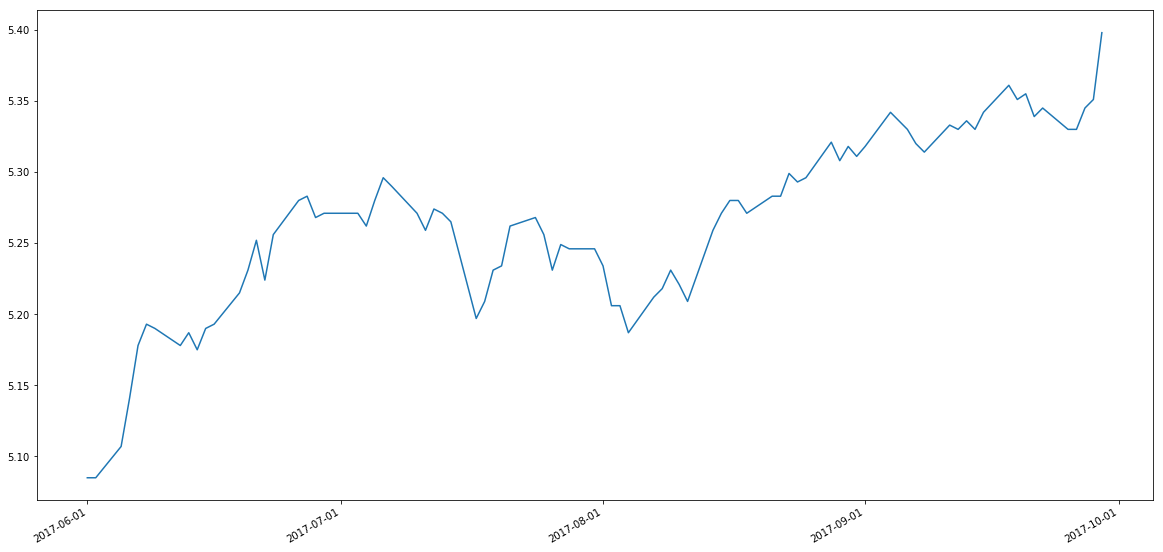

In [221]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#data = data[:10]
# 生成横纵坐标信息
xd:np.ndarray = np.array([_date[0] for _date in data[0:len(data),0:1]])
yd:np.ndarray = np.array([data[i][2] for i in range(0, len(xd))])

plt.figure(figsize=(20,10))
    
# 配置横坐标
axais = plt.gca().xaxis
axais.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
axais.set_major_locator(mdates.MonthLocator())
# 绘制
[chart] = plt.plot(xd, yd)

plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.show()